In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

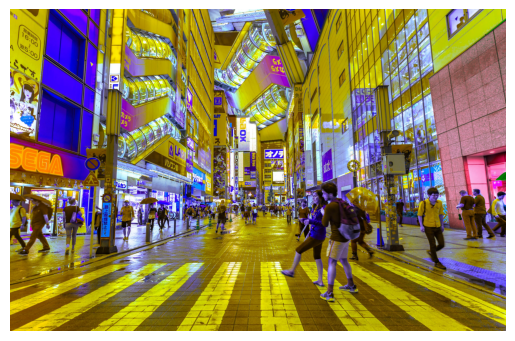

In [4]:
image = cv2.imread("3.jpeg")
plt.axis("off")
plt.imshow(image)  


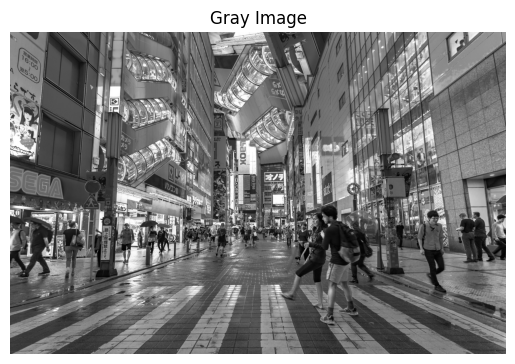

In [5]:
img = cv2.imread("3.jpeg", cv2.IMREAD_GRAYSCALE)

cv2.imwrite("sunset_gray.jpg", img) 
plt.imshow(img, cmap='gray')   
plt.title("Gray Image")
plt.axis("off")
plt.show()

In [6]:
# Brightness improvement
bright_up = cv2.convertScaleAbs(img, alpha=1, beta=50)


In [7]:
# Brightness reduction
bright_down = cv2.convertScaleAbs(img, alpha=1, beta=-50)

In [8]:
# Thresholding
_, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

In [9]:
# Negative
negative = 255 - img

In [10]:
# Log transform
c = 255 / np.log(1 + np.max(img))
log_trans = c * (np.log(1 + img))
log_trans = np.array(log_trans, dtype=np.uint8)


C:\Users\Vedant\AppData\Local\Temp\ipykernel_10024\581750530.py:2: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
C:\Users\Vedant\AppData\Local\Temp\ipykernel_10024\581750530.py:2: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
C:\Users\Vedant\AppData\Local\Temp\ipykernel_10024\581750530.py:3: RuntimeWarning: divide by zero encountered in log
  log_trans = c * (np.log(1 + img))
C:\Users\Vedant\AppData\Local\Temp\ipykernel_10024\581750530.py:3: RuntimeWarning: invalid value encountered in multiply
  log_trans = c * (np.log(1 + img))
C:\Users\Vedant\AppData\Local\Temp\ipykernel_10024\581750530.py:4: RuntimeWarning: invalid value encountered in cast
  log_trans = np.array(log_trans, dtype=np.uint8)


In [11]:
# Power Law (Gamma) transform
gamma = 0.5  
gamma_corrected = np.array(255 * (img / 255) ** gamma, dtype=np.uint8)


In [12]:
r1, r2 = 50, 60
c1, c2 = 50, 60

print("Original Gray pixel values (50:60, 50:60):\n", img[r1:r2, c1:c2])
print("\nBrightness Increased pixel values:\n", bright_up[r1:r2, c1:c2])
print("\nBrightness Reduced pixel values:\n", bright_down[r1:r2, c1:c2])
print("\nThresholded pixel values:\n", thresh[r1:r2, c1:c2])
print("\nNegative pixel values:\n", negative[r1:r2, c1:c2])
print("\nLog Transform pixel values:\n", log_trans[r1:r2, c1:c2])
print("\nGamma(0.5) Transform pixel values:\n", gamma_corrected[r1:r2, c1:c2])


Original Gray pixel values (50:60, 50:60):
 [[136 136 135 136 137 139 138 138 139 139]
 [136 136 135 136 138 140 138 138 139 139]
 [137 137 136 137 139 141 138 138 139 139]
 [138 138 137 137 139 141 138 138 139 139]
 [138 138 137 137 138 139 138 138 139 139]
 [137 138 137 137 137 137 138 138 139 139]
 [139 136 136 138 140 140 139 138 137 137]
 [139 137 135 138 139 138 139 138 137 137]
 [139 136 136 138 140 140 138 138 137 137]
 [138 136 136 140 142 142 138 138 138 138]]

Brightness Increased pixel values:
 [[186 186 185 186 187 189 188 188 189 189]
 [186 186 185 186 188 190 188 188 189 189]
 [187 187 186 187 189 191 188 188 189 189]
 [188 188 187 187 189 191 188 188 189 189]
 [188 188 187 187 188 189 188 188 189 189]
 [187 188 187 187 187 187 188 188 189 189]
 [189 186 186 188 190 190 189 188 187 187]
 [189 187 185 188 189 188 189 188 187 187]
 [189 186 186 188 190 190 188 188 187 187]
 [188 186 186 190 192 192 188 188 188 188]]

Brightness Reduced pixel values:
 [[86 86 85 86 87 89 88

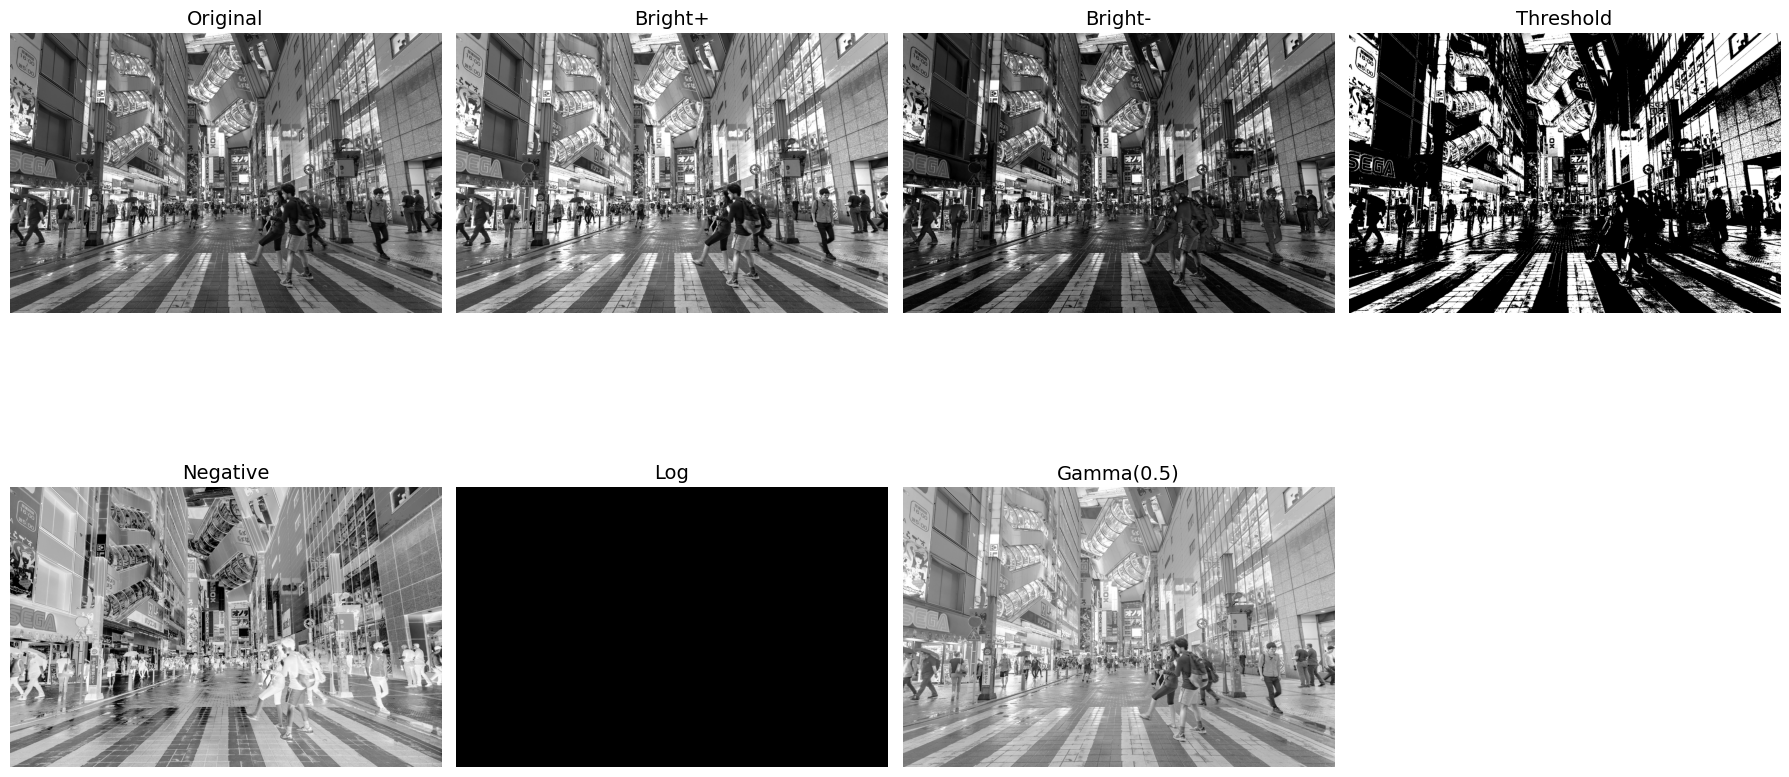

In [13]:
import matplotlib.pyplot as plt

titles = ['Original','Bright+','Bright-','Threshold','Negative','Log','Gamma(0.5)']
images = [img, bright_up, bright_down, thresh, negative, log_trans, gamma_corrected]

plt.figure(figsize=(18,10))  

for i in range(len(images)):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=14)  
    plt.axis('off')

plt.tight_layout()   
plt.show()

In [14]:
print(img.shape)   
print(img.dtype)    

(1946, 3000)
uint8
